In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from itertools import combinations
from collections import Counter

In [2]:
data = pd.read_csv("all_data.csv")

In [3]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
data[data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 9.9+ MB


In [7]:
data = data[data['Order Date'].str[0:2]!='Or']

In [8]:
data['Order Date']=pd.to_datetime(data['Order Date'])

In [9]:
data['Order Month']=data['Order Date'].dt.month

In [10]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [11]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

data['City'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


1. Which month has the most sales and what was the total sales?

In [12]:
data['Sales'] = data['Quantity Ordered'].astype('int') * data['Price Each'].astype('float')

In [13]:
Sales_by_month = data.groupby('Order Month').sum()
Sales_by_month

,Sales
Order Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


In [14]:
months = []
for i in range(1,13):
    months.append(datetime.date(2008, i, 1).strftime('%B'))

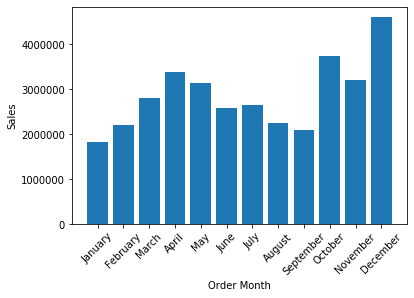

In [15]:
plt.bar(months,Sales_by_month['Sales'])
plt.xticks(months,rotation=45)
plt.ylabel('Sales')
plt.xlabel('Order Month')
plt.show()

2. Which city had the most sales?

In [16]:
Quantity_Sales_by_city = data.groupby('City').sum()['Sales']
Quantity_Sales_by_city

City
Atlanta  (GA)          2.795499e+06
Austin  (TX)           1.819582e+06
Boston  (MA)           3.661642e+06
Dallas  (TX)           2.767975e+06
Los Angeles  (CA)      5.452571e+06
New York City  (NY)    4.664317e+06
Portland  (ME)         4.497583e+05
Portland  (OR)         1.870732e+06
San Francisco  (CA)    8.262204e+06
Seattle  (WA)          2.747755e+06
Name: Sales, dtype: float64

In [17]:
Quantity_Sales_by_city.index

Index(['Atlanta  (GA)', 'Austin  (TX)', 'Boston  (MA)', 'Dallas  (TX)',
       'Los Angeles  (CA)', 'New York City  (NY)', 'Portland  (ME)',
       'Portland  (OR)', 'San Francisco  (CA)', 'Seattle  (WA)'],
      dtype='object', name='City')

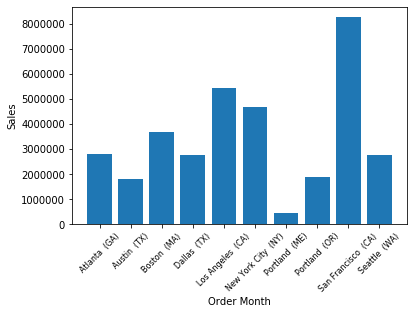

In [18]:
cities = [city for city in Quantity_Sales_by_city.index]

plt.bar(cities,Quantity_Sales_by_city)
plt.ylabel('Sales')
plt.xlabel('Order Month')
plt.xticks(cities, rotation=45, size=8)
plt.show()

3. What time should we display advertisements to maximize likelihood of customer's buying product?

In [19]:
data['Hour'] = pd.to_datetime(data['Order Date']).dt.hour

In [20]:
data.groupby('Hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,City,Sales
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


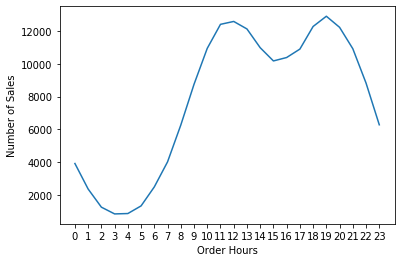

In [21]:
hours = [i for i in range(0,24)]

plt.plot(hours, data.groupby('Hour').count()['Order ID'])
plt.xticks(hours)
plt.ylabel('Number of Sales')
plt.xlabel('Order Hours')
plt.show()

4. What products are most often sold together?

In [22]:
data_1 = data[data['Order ID'].duplicated(keep=False)]
data_1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,City,Sales,Hour
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14
18,176574,Google Phone,1,600,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),11.95,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston (MA),99.99,11


In [23]:
data_1['Products'] = data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\Siang513\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
data_2=data_1[['Order ID', 'Products']].drop_duplicates()
data_2

,Order ID,Products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [25]:
count = Counter()

for row in data_2['Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [26]:
count = Counter()

for row in data_2['Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

for key,value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


5. What is the most sold product?

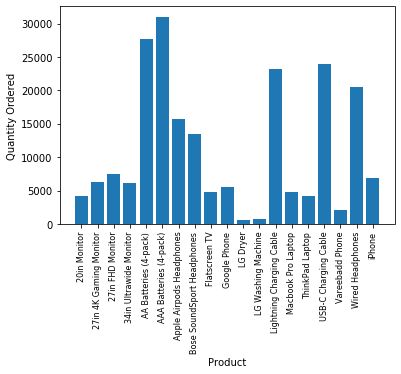

In [27]:
data['Quantity Ordered'] = data['Quantity Ordered'].astype('int')
Products = data.groupby('Product')
Quantity_ordered_by_product = Products.sum()['Quantity Ordered']

products = [pair for pair, df in Products]
plt.bar(products, Quantity_ordered_by_product)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

C:\Users\Siang513\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


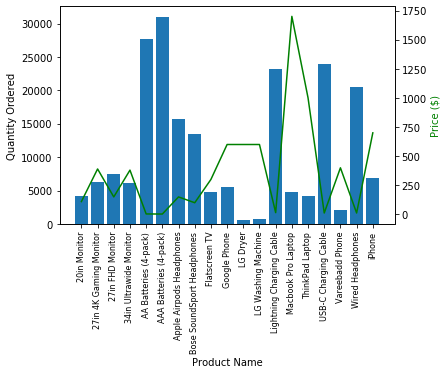

In [29]:
data['Price Each'] = data['Price Each'].astype('float')
Price = data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, Quantity_ordered_by_product)
ax2.plot(products, Price, color='g')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price ($)', color='g')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()